<a href="https://colab.research.google.com/github/0x444cecilg/data_science_internship/blob/no_face_detect/face_detect_comparison_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the assessment of face detection models, our primary focus lies in scrutinizing unstructured data, particularly images, which present unique challenges necessitating precise solutions. This study undertakes a comparative analysis of three pretrained face detection models: DLIB_CNN, DLIB_HOG_CNN, and MTCNN.

The DLIB_CNN model leverages dlib's cnn_face_detection_model_v1 to instantiate a Convolutional Neural Network (CNN) based on the "mmod_human_face_detector.dat" pre-trained model. This model is adept at discerning facial features within images.

The DLIB_HOG_CNN model is a hybrid approach, combining both dlib's cnn_face_detection_model_v1 and get_frontal_face_detector(). It integrates the strengths of CNN and Histogram of Oriented Gradients (HOG) techniques, using the "mmod_human_face_detector.dat" model for enhanced face detection, particularly focusing on frontal poses.

The MTCNN (Multi-Task Cascaded Convolutional Networks) is implemented through the facenet_pytorch library. MTCNN employs a cascaded architecture of neural networks for face detection and facial landmark localization. This model, recognized for its effectiveness in real-time face detection and versatility in handling diverse angles and poses, contributes to the holistic comparison of face detection methodologies.

Our specific emphasis during this evaluation is directed towards identifying the model that exhibits the optimal balance between the lowest false positive rate and the highest precision. These critical metrics play an integral role in evaluating the efficacy of these pretrained models in furnishing accurate and dependable face detection results.

## Face Detection Model Comparison MTCNN vs DLIB_HOG_CNN (resize_width 500px)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<strong><em>I have provided the data for the DLIB_CNN detector separately from the DLIB_HOG_CNN detector for the purpose of facilitating a comparison between the performance of each individual model and their combined performance.</em><strong>

In [2]:

data = [
    {"model": "DLIB_CNN", "threshold": 0.2, "execution_time": 189.18, "precision_no_face": 0.34, "recall_no_face": 0.99, "precision_face": 1.00, "recall_face": 0.90, "TP": 72, "FP": 138, "TN": 1182, "FN": 1, "f1_score_no_face": 0.51, "f1_score_face": 0.94},
    {"model": "DLIB_CNN", "threshold": 0.3, "execution_time": 175.99, "precision_no_face": 0.33, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.89, "TP": 73, "FP": 146, "TN": 1174, "FN": 0, "f1_score_no_face": 0.50, "f1_score_face": 0.94},
    {"model": "DLIB_CNN", "threshold": 0.4, "execution_time": 176.24, "precision_no_face": 0.32, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.88, "TP": 73, "FP": 158, "TN": 1162, "FN": 0, "f1_score_no_face": 0.48, "f1_score_face": 0.94},
    {"model": "DLIB_CNN", "threshold": 0.5, "execution_time": 179.84, "precision_no_face": 0.31, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.87, "TP": 73, "FP": 166, "TN": 1154, "FN": 0, "f1_score_no_face": 0.47, "f1_score_face": 0.93},
    {"model": "DLIB_CNN", "threshold": 0.6, "execution_time": 181.23, "precision_no_face": 0.29, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.87, "TP": 73, "FP": 178, "TN": 1142, "FN": 0, "f1_score_no_face": 0.45, "f1_score_face": 0.93},
    {"model": "DLIB_CNN", "threshold": 0.7, "execution_time": 185.95, "precision_no_face": 0.28, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.86, "TP": 73, "FP": 188, "TN": 1132, "FN": 0, "f1_score_no_face": 0.44, "f1_score_face": 0.92},
    {"model": "DLIB_CNN", "threshold": 0.8, "execution_time": 191.97, "precision_no_face": 0.26, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.84, "TP": 73, "FP": 209, "TN": 1111, "FN": 0, "f1_score_no_face": 0.41, "f1_score_face": 0.91},
    {"model": "DLIB_CNN", "threshold": 0.9, "execution_time": 197.03, "precision_no_face": 0.23, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.82, "TP": 73, "FP": 240, "TN": 1080, "FN": 0, "f1_score_no_face": 0.38, "f1_score_face": 0.90},
    {"model": "DLIB_HOG_CNN", "threshold": 0.2, "execution_time": 320.49, "precision_no_face": 0.45, "recall_no_face": 0.99, "precision_face": 1.00, "recall_face": 0.93, "TP": 72, "FP": 87, "TN": 1233, "FN": 1, "f1_score_no_face": 0.62, "f1_score_face": 0.97},
    {"model": "DLIB_HOG_CNN", "threshold": 0.3, "execution_time": 282.22, "precision_no_face": 0.44, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.93, "TP": 73, "FP": 93, "TN": 1227, "FN": 0, "f1_score_no_face": 0.61, "f1_score_face": 0.96},
    {"model": "DLIB_HOG_CNN", "threshold": 0.4, "execution_time": 286.25, "precision_no_face": 0.42, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.92, "TP": 73, "FP": 102, "TN": 1218, "FN": 0, "f1_score_no_face": 0.59, "f1_score_face": 0.96},
    {"model": "DLIB_HOG_CNN", "threshold": 0.5, "execution_time": 285.34, "precision_no_face": 0.40, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.92, "TP": 73, "FP": 108, "TN": 1212, "FN": 0, "f1_score_no_face": 0.57, "f1_score_face": 0.96},
    {"model": "DLIB_HOG_CNN", "threshold": 0.6, "execution_time": 293.10, "precision_no_face": 0.38, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.91, "TP": 73, "FP": 119, "TN": 1201, "FN": 0, "f1_score_no_face": 0.55, "f1_score_face": 0.95},
    {"model": "DLIB_HOG_CNN", "threshold": 0.7, "execution_time": 298.10, "precision_no_face": 0.36, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.90, "TP": 73, "FP": 129, "TN": 1191, "FN": 0, "f1_score_no_face": 0.53, "f1_score_face": 0.95},
    {"model": "DLIB_HOG_CNN", "threshold": 0.8, "execution_time": 303.43, "precision_no_face": 0.33, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.89, "TP": 73, "FP": 150, "TN": 1170, "FN": 0, "f1_score_no_face": 0.49, "f1_score_face": 0.94},
    {"model": "DLIB_HOG_CNN", "threshold": 0.9, "execution_time": 313.09, "precision_no_face": 0.29, "recall_no_face": 1.00, "precision_face": 1.00, "recall_face": 0.87, "TP": 73, "FP": 176, "TN": 1144, "FN": 0, "f1_score_no_face": 0.45, "f1_score_face": 0.93},
    {"model": "MTCNN", "threshold": 0.2, "execution_time": 1174.27, "precision_no_face": 0.71, "recall_no_face": 0.07, "precision_face": 0.95, "recall_face": 1.00, "TP": 5, "FP": 2, "TN": 1318, "FN": 68, "f1_score_no_face": 0.12, "f1_score_face": 0.97},
    {"model": "MTCNN", "threshold": 0.3, "execution_time": 734.29, "precision_no_face": 0.50, "recall_no_face": 0.18, "precision_face": 0.96, "recall_face": 0.99, "TP": 13, "FP": 13, "TN": 1307, "FN": 60, "f1_score_no_face": 0.26, "f1_score_face": 0.97},
    {"model": "MTCNN", "threshold": 0.4, "execution_time": 580.15, "precision_no_face": 0.53, "recall_no_face": 0.41, "precision_face": 0.97, "recall_face": 0.98, "TP": 30, "FP": 27, "TN": 1293, "FN": 43, "f1_score_no_face": 0.46, "f1_score_face": 0.97},
    {"model": "MTCNN", "threshold": 0.5, "execution_time": 475.63, "precision_no_face": 0.52, "recall_no_face": 0.60, "precision_face": 0.98, "recall_face": 0.97, "TP": 44, "FP": 40, "TN": 1280, "FN": 29, "f1_score_no_face": 0.56, "f1_score_face": 0.97},
    {"model": "MTCNN", "threshold": 0.6, "execution_time": 423.49, "precision_no_face": 0.50, "recall_no_face": 0.74, "precision_face": 0.99, "recall_face": 0.96, "TP": 54, "FP": 55, "TN": 1265, "FN": 19, "f1_score_no_face": 0.59, "f1_score_face": 0.97},
    {"model": "MTCNN", "threshold": 0.7, "execution_time": 381.78, "precision_no_face": 0.48, "recall_no_face": 0.81, "precision_face": 0.99, "recall_face": 0.95, "TP": 59, "FP": 63, "TN": 1257, "FN": 14, "f1_score_no_face": 0.61, "f1_score_face": 0.97},
    {"model": "MTCNN", "threshold": 0.8, "execution_time": 356.22, "precision_no_face": 0.46, "recall_no_face": 0.89, "precision_face": 0.99, "recall_face": 0.94, "TP": 65, "FP": 75, "TN": 1245, "FN": 8, "f1_score_no_face": 0.61, "f1_score_face": 0.97},
    {"model": "MTCNN", "threshold": 0.9, "execution_time": 340.87, "precision_no_face": 0.38, "recall_no_face": 0.90, "precision_face": 0.99, "recall_face": 0.92, "TP": 66, "FP": 110, "TN": 1210, "FN": 7, "f1_score_no_face": 0.53, "f1_score_face": 0.95}
]
results_df = pd.DataFrame(data)


## Confusion Matrix  
<br>
*Threshold can be changed as second arguement in the plot_custom_confusion_matrices function

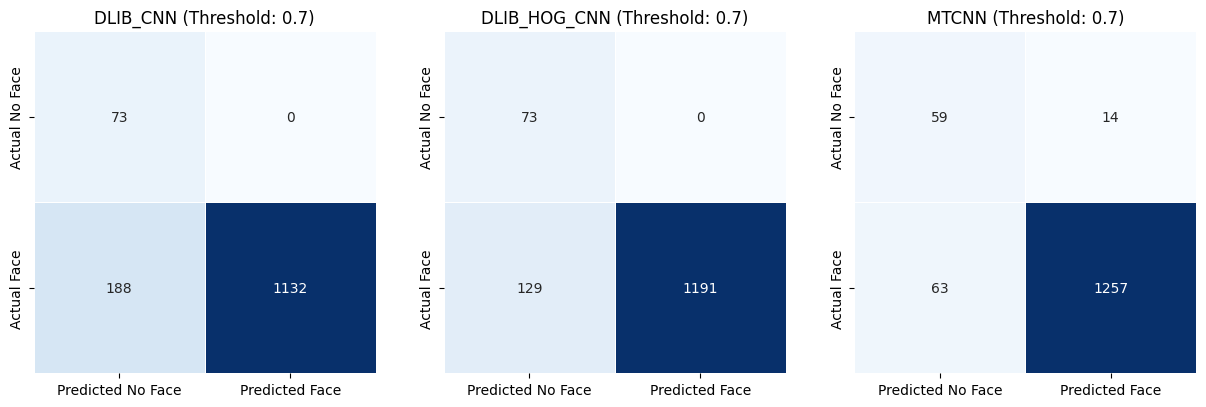

In [3]:
def plot_custom_confusion_matrices(df, threshold):
    unique_models = df['model'].unique()
    n_models = len(unique_models)
    fig, axes = plt.subplots(1, n_models, figsize=(n_models * 5, 5))

    for i, model in enumerate(unique_models):
        model_data = df[(df['model'] == model) & (df['threshold'] == threshold)].iloc[0]
        tp = model_data['TP']
        fp = model_data['FP']
        fn = model_data['FN']
        tn = model_data['TN']
        data = pd.DataFrame({"Predicted No Face": [tp, fp], "Predicted Face": [fn, tn]}, index=["Actual No Face", "Actual Face"])
        ax = sns.heatmap(data, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, linewidths=0.5, ax=axes[i])
        axes[i].set_title(f'{model} (Threshold: {threshold})')

    plt.show()
plot_custom_confusion_matrices(results_df, 0.7)


<p><strong>Upon comparing the False Positive Rates (FPR) of the DLIB_CNN face detector to the combined HOG_Front face detector and CNN detector, the CNN detector alone exhibits a minimum increase of 3.66% in FPR at a threshold of 0.2 and a maximum increase of 4.6% at a threshold of 0.9, when compared to the combined HOG_Front face and CNN model. <em>At all thresholds, the MTCNN model demonstrates a lower FPR.</em> Specifically, at a threshold of 0.2, MTCNN generates 2 false positives out of 1393 images tested, yielding an FPR of 0.14%, while the DLIB_HOG_CNN model produces 87 false positives out of 1393 images tested, resulting in an FPR of 6.24%. At a threshold of 0.9, MTCNN records 110 false positives out of 1393 images tested, corresponding to an FPR of 7.89%, while the DLIB_HOG_CNN model registers 176 false positives out of 1393 images tested, with an FPR of 12.63%</strong></p>


## Average False Positive Rate (FPR)

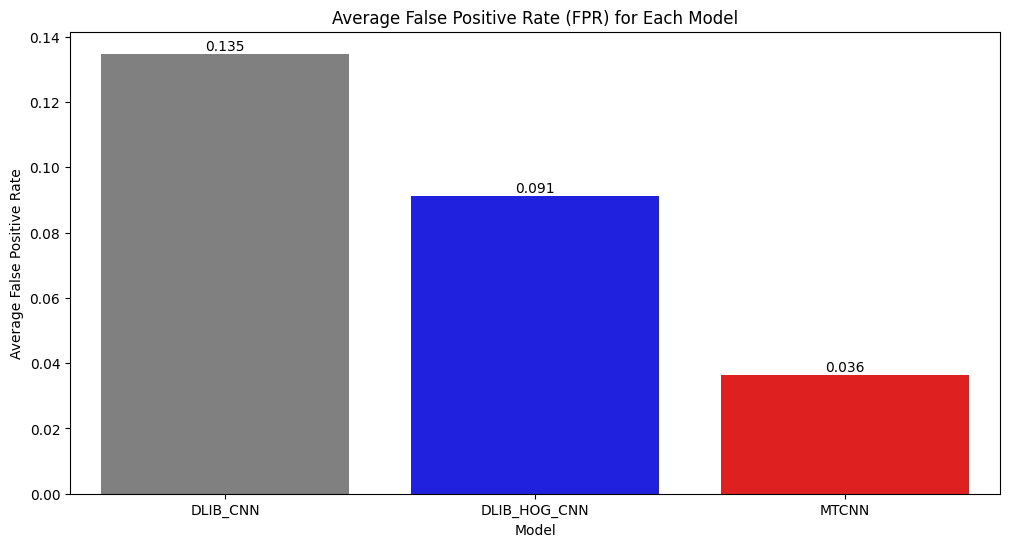

In [4]:
model_colors = {
    'DLIB_CNN': 'grey',
    'DLIB_HOG_CNN': 'blue',
    'MTCNN': 'red'
}

# Calculate False Positive Rate (FPR) and add it to the DataFrame
results_df['FPR'] = results_df['FP'] / (results_df['FP'] + results_df['TN'])

# Calculate average FPR for each model
average_fpr = results_df.groupby('model')['FPR'].mean().reset_index()

# Create the barplot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='model', y='FPR', data=average_fpr, palette=model_colors)
plt.title('Average False Positive Rate (FPR) for Each Model')
plt.xlabel('Model')
plt.ylabel('Average False Positive Rate')

for i, bar in enumerate(barplot.patches):
    fpr_value = average_fpr.iloc[i]['FPR']
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{fpr_value:.3f}", ha="center", va="bottom")

plt.show()

<strong>In comparative analysis of the two models, we can observe that the MTCNN model exhibits the best performance with an average False Positive Rate (FPR) of 0.036, demonstrating its ability to minimize false positive detections effectively. The DLIB_HOG_CNN model, displaying an average FPR of 0.091, demonstrates a performance approximately 2.5 times higher in terms of average false positive rate when compared to the MTCNN model.</strong>

## Execution Time

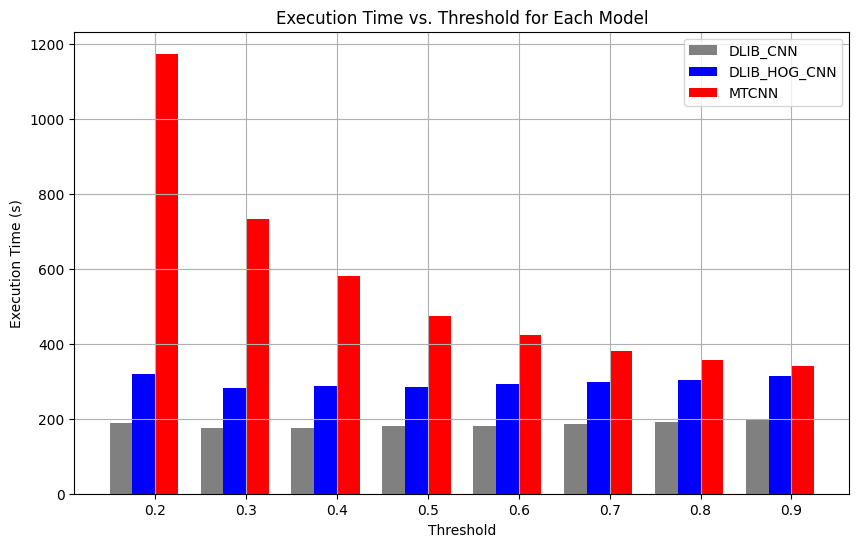

In [5]:
model_names = results_df['model'].unique()

model_colors = {
    'DLIB_CNN': 'grey',
    'DLIB_HOG_CNN': 'blue',
    'MTCNN': 'red'
}

thresholds = results_df['threshold'].unique()
thresholds.sort()

n_models = len(model_names)
bar_width = 1 / (n_models + 1)

plt.figure(figsize=(10, 6))

for idx, model in enumerate(model_names):
    model_df = results_df[results_df['model'] == model]
    color = model_colors[model]

    bar_positions = np.arange(len(thresholds)) + idx * bar_width
    plt.bar(bar_positions, model_df['execution_time'], width=bar_width, color=color, label=model)

plt.xlabel('Threshold')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Threshold for Each Model')
plt.xticks(np.arange(len(thresholds)) + n_models * bar_width / 2, thresholds)
plt.legend()
plt.grid()
plt.show()

<strong>Upon evaluating the execution time for both the MTCNN and DLIB_HOG_CNN models, it becomes apparent that the MTCNN model requires a substantially longer execution time at lower classification thresholds compared to the DLIB_HOG_CNN model.</strong>

## Precision/Recall vs Threshold

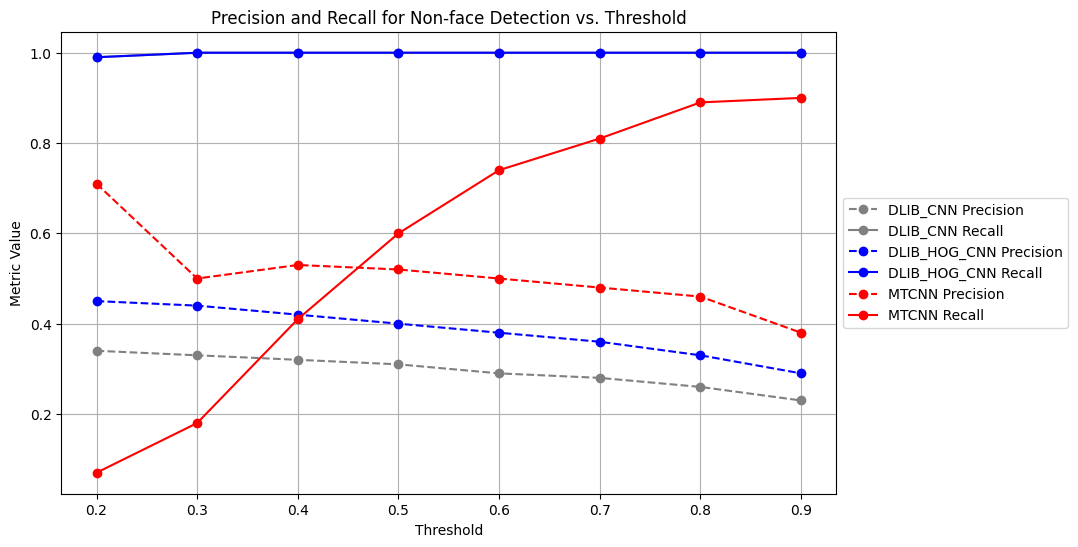

In [6]:
model_names = results_df['model'].unique()

model_colors = {
    'DLIB_CNN': 'grey',
    'DLIB_HOG_CNN': 'blue',
    'MTCNN': 'red'
}

plt.figure(figsize=(10, 6))

for model in model_names:
    model_df = results_df[results_df['model'] == model]
    color = model_colors[model]
    plt.plot(model_df['threshold'], model_df['precision_no_face'], label=f'{model} Precision', linestyle='--', marker='o', color=color)
    plt.plot(model_df['threshold'], model_df['recall_no_face'], label=f'{model} Recall', linestyle='-', marker='o', color=color)

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Precision and Recall for Non-face Detection vs. Threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()
plt.show()

<strong>The DLIB_HOG_CNN model maintains consistently high recall for "no face" instances across all thresholds but experiences decreasing precision as the threshold increases. In contrast, the MTCNN model exhibits a trade-off between precision and recall for "no face" instances when plotted against the threshold. This is represented by the MTCNN model's convergence of precision and recall values at a threshold of approximately 0.45. This point highlights a unique balance between precision and recall for the MTCNN model, whereas the DLIB_HOG_CNN model does not exhibit a similar behaviour in its precision and recall trends as the threshold increases.</strong>

## F-1 Score

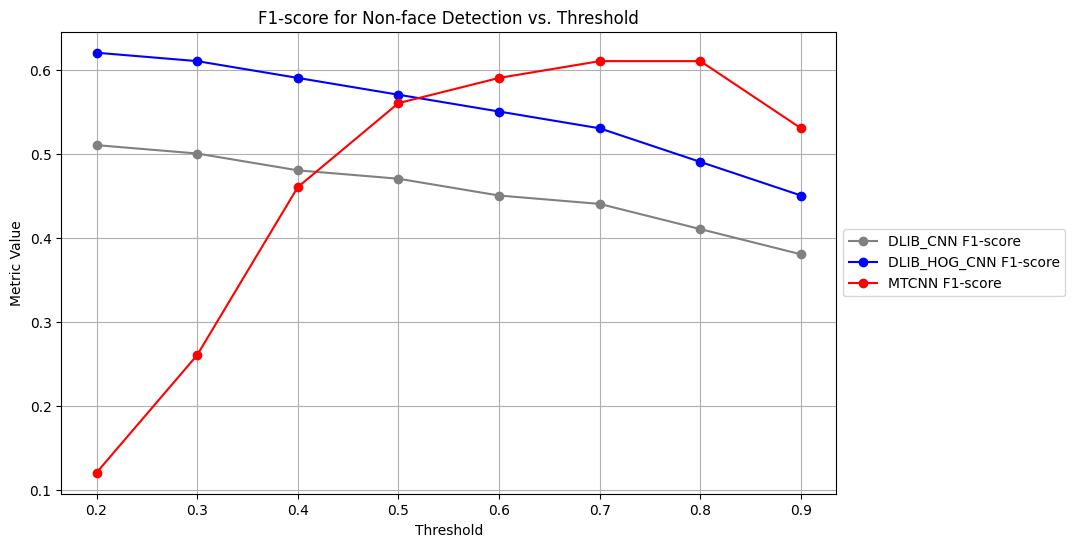

In [7]:

model_names = results_df['model'].unique()

model_colors = {
    'DLIB_CNN': 'grey',
    'DLIB_HOG_CNN': 'blue',
    'MTCNN': 'red'
}

plt.figure(figsize=(10, 6))

for model in model_names:
    model_df = results_df[results_df['model'] == model]
    color = model_colors[model]
    plt.plot(model_df['threshold'], model_df['f1_score_no_face'], label=f'{model} F1-score', linestyle='-', marker='o', color=color)


plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('F1-score for Non-face Detection vs. Threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()
plt.show()

<strong>The performance of the DLIB_HOG_CNN and MTCNN models varies depending on the threshold used. At lower thresholds (below 0.5), the DLIB_HOG_CNN model outperforms the MTCNN model in terms of F-1 scores, indicating better performance in detecting "no face" instances. However, as the threshold increases (above 0.5), the MTCNN model begins to outperform the DLIB_HOG_CNN model, achieving higher F-1 scores and thus demonstrating a better balance between precision and recall in detecting "no face" instances.</strong>

## Precision-Recall Curve

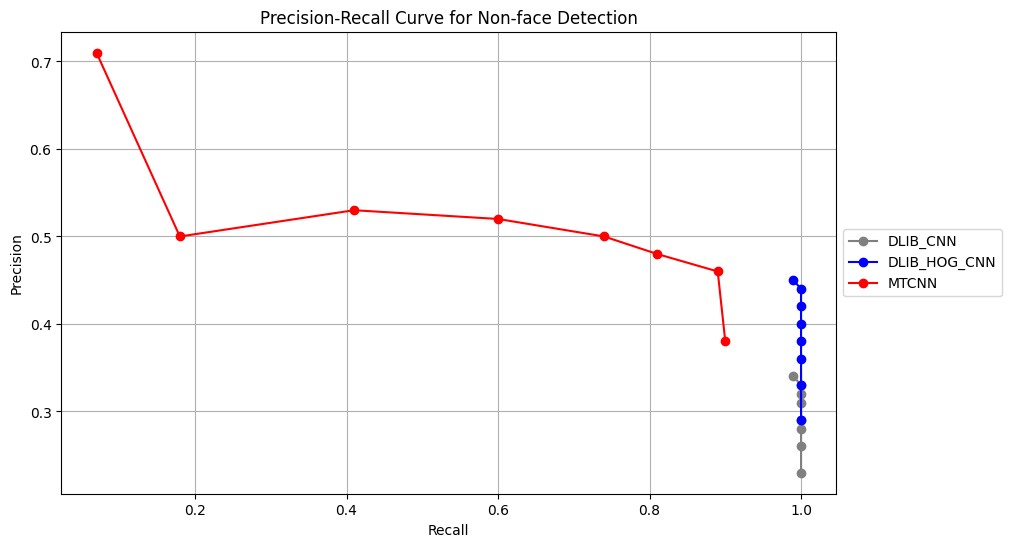

In [8]:
plt.figure(figsize=(10, 6))

for model in model_names:
    model_df = results_df[results_df['model'] == model]
    color = model_colors[model]
    plt.plot(model_df['recall_no_face'], model_df['precision_no_face'], label=f'{model}', linestyle='-', marker='o', color=color)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Non-face Detection')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()
plt.show()

<strong>The MTCNN model displays a varying trade-off between precision and recall. At lower recall values, the model achieves higher precision; however, as recall increases, precision diminishes, signifying that the model captures more "no face" instances but also misclassifies some "face" instances as "no face."
<br>
<br>
In contrast, the DLIB_HOG_CNN model consistently exhibits high recall for detecting "no face" instances across a range of thresholds. The initial precision value of 0.45 for the model implies a substantial false positive rate, as it incorrectly identifies numerous "face" instances as "no face." This high false positive rate corresponds to the true positive rate and affects the overall performance of the DLIB_HOG_CNN model.</strong>




<strong>Based on the analysis, we can see that the MTCNN model is a good choice for reducing false positives when detecting "no face" instances. It consistently performs better than the DLIB_HOG_CNN model across different thresholds. However, this improved performance comes at the cost of longer execution times, which might make it less practical for some applications. The MTCNN model finds a nice balance between precision and recall at a classification threshold of 0.45. This balance highlights the potential of the MTCNN model for better performance in "no face" detection tasks, but it's important to consider the trade-off in terms of how long it takes to run.
<br>
<br>
It is important to note that the face detection models used in this project were tested using images resized to a width of 500 pixels. Reducing the image size can significantly improve the MTCNN model's execution time, but at the cost of an increased False Positive Rate (FPR). For example, when the MTCNN model is run at a threshold of 0.4 with a resize width of 500 pixels, the execution time is approximately 580 seconds and the FPR is 1.9%. However, when the model is run at a resize width of 250 pixels with the same threshold of 0.4, the execution time is approximately 280 seconds and the FPR is 2.7%. This represents a 52% reduction in execution time at the cost of an increase in FPR of approximately 41%, demonstrating the trade-off between processing speed and detection accuracy.<strong>


## MTCNN Performance Metrics vs Resize Width (Theshold 0.45)


In [9]:
data2 = {
    'resize_width': [100, 200, 300, 400, 500, 600, 700, 800, 900],
    'no_faces_detected': [212, 94, 79, 69, 72, 58, 55, 47, 47],
    'execution_time': [177.036, 216.994, 297.631, 400.263, 527.695, 643.416, 801.274, 956.84, 1165.18],
    'true_positive_rate': [59/(59+14), 43/(43+30), 39/(39+34), 37/(37+36), 36/(36+37), 27/(27+46), 29/(29+44), 23/(23+50), 22/(22+51)],
    'false_positive_rate': [153/(1167+153), 51/(1269+51), 40/(1280+40), 32/(1288+32), 36/(1284+36), 31/(1289+31), 26/(1294+26), 24/(1296+24), 25/(1295+25)]
}

MTCNN_df = pd.DataFrame(data2)
MTCNN_df.set_index('resize_width', inplace=True)



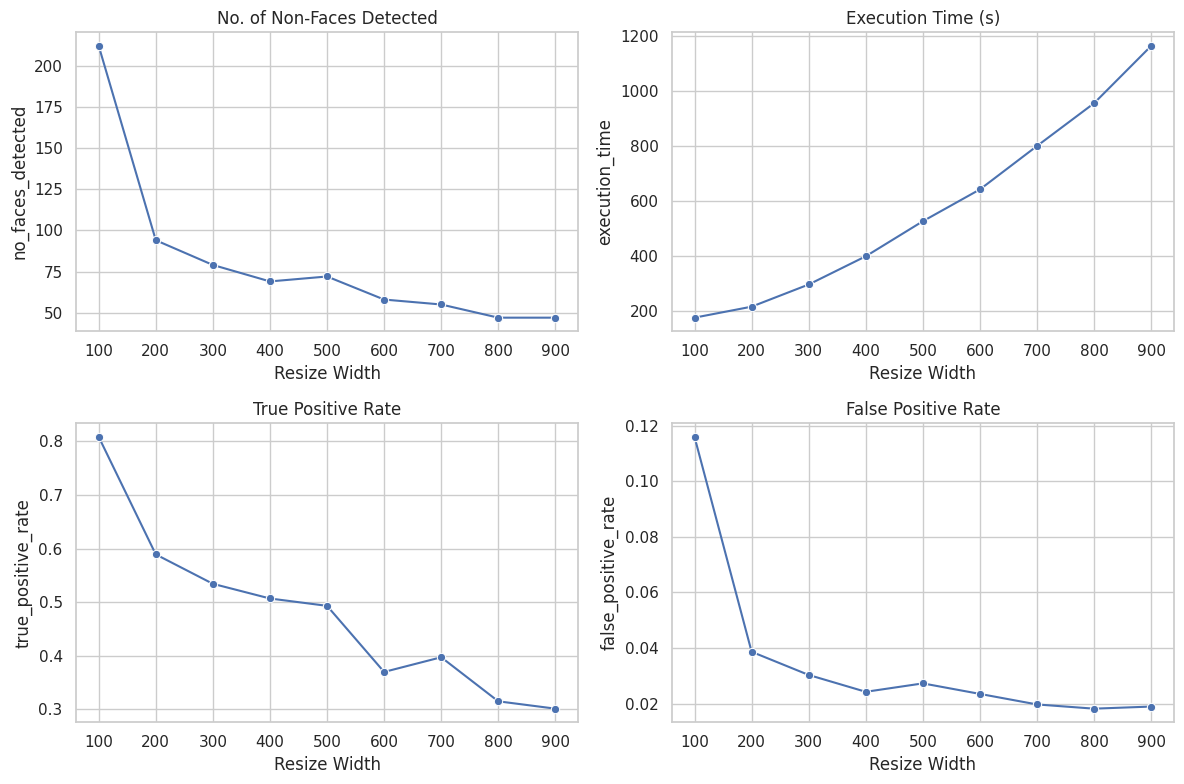

In [10]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.lineplot(data=MTCNN_df, x=MTCNN_df.index, y='no_faces_detected', ax=axes[0, 0], marker='o')
sns.lineplot(data=MTCNN_df, x=MTCNN_df.index, y='execution_time', ax=axes[0, 1], marker='o')
sns.lineplot(data=MTCNN_df, x=MTCNN_df.index, y='true_positive_rate', ax=axes[1, 0], marker='o')
sns.lineplot(data=MTCNN_df, x=MTCNN_df.index, y='false_positive_rate', ax=axes[1, 1], marker='o')
axes[0, 0].set_title('No. of Non-Faces Detected')
axes[0, 1].set_title('Execution Time (s)')
axes[1, 0].set_title('True Positive Rate')
axes[1, 1].set_title('False Positive Rate')

for i in range(2):
    for j in range(2):
        axes[i, j].set_xlabel('Resize Width')

plt.tight_layout()
plt.show()


<strong>Upon analyzing the performance of the MTCNN model at various image resize widths with a threshold of 0.45, it becomes evident that a width of 400 pixels offers an optimal balance between false positive rate and execution time. At this resize width, the model demonstrates a favorable trade-off between minimizing false positives and maintaining an efficient execution time.</strong>